In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings(action='ignore') 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [2]:
df = pd.read_csv('../../../high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


0    4949
1    4930
Name: blueWins, dtype: int64


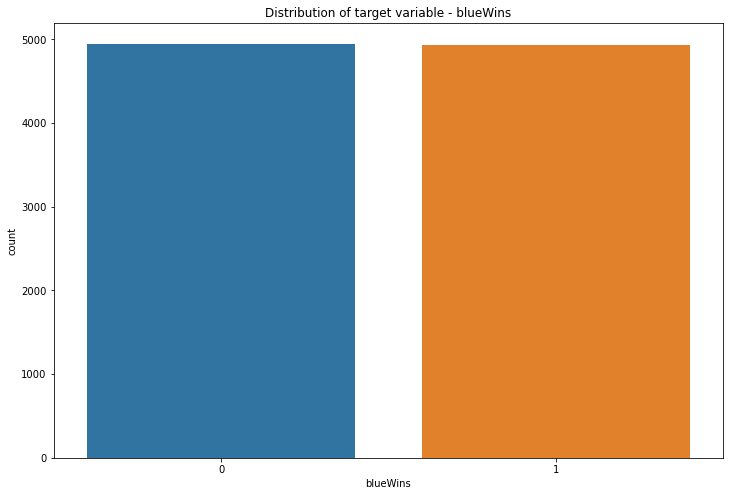

In [3]:
plt.figure(figsize=(12,8))
plt.title('Distribution of target variable - blueWins')
plt.ylabel('Amount of wins')
sns.countplot(df['blueWins'])
print(df['blueWins'].value_counts())

In [4]:
#df = df.drop('gameId', axis=1)

In [5]:
df = df.drop(['gameId','blueEliteMonsters','blueTotalGold','blueTotalExperience','blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin','blueGoldPerMin','redFirstBlood', 'redEliteMonsters',
'redTotalGold', 'redTotalExperience', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin','redGoldPerMin','redWardsPlaced', 'redWardsDestroyed','blueDeaths', 'redDeaths'], axis=1)

In [6]:
X = df.drop('blueWins',axis=1)
y = df.blueWins
X_tr, X_test, y_tr, y_test = train_test_split(X,y,random_state=42)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, random_state=42)

In [8]:
def modeling_function(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    print('Training accuracy:', accuracy_score(y_train, train_preds))
    print("validation accuracy: ", accuracy_score(y_val, val_preds))

    return model

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(X_train)

StandardScaler()

In [11]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X.columns)

In [12]:
dtc = DecisionTreeClassifier(random_state=42)

In [13]:
dtc_fitted = modeling_function(dtc, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 1.0
validation accuracy:  0.6087425796006476


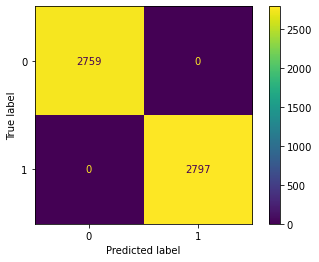

In [14]:
plot_confusion_matrix(dtc_fitted, X_train_scaled, y_train)

In [15]:
param_grid = {'criterion': ["gini", "entropy"],
             'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11,12,13,14],
             'max_depth': [2,3,4,5,6,7,8,9,10,11,12]
             }

In [16]:
dtc_gs = GridSearchCV(estimator=dtc, param_grid=param_grid, scoring='accuracy')

In [17]:
dtc_gs.fit(X_train_scaled, y_train)

KeyboardInterrupt: 

In [79]:
dtc_gs_model = dtc_gs.best_estimator_

In [80]:
dtc_gs.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': 12}

In [18]:
dtc2 = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=12, random_state=42, criterion='entropy')

In [19]:
modeling_function(dtc2, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 0.6985241180705544
validation accuracy:  0.7053426875337291


DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=12,
                       random_state=42)

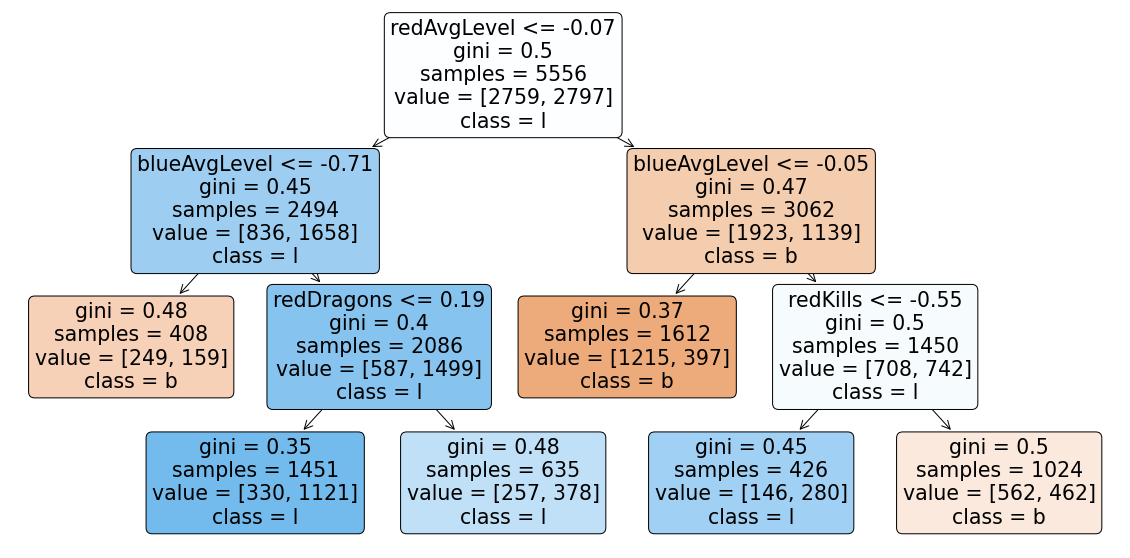

In [20]:


final_tree_model = DecisionTreeClassifier(max_depth = 4,max_leaf_nodes=6, random_state=42)
final_tree_model.fit(X_train_scaled, y_train)
predictions = final_tree_model.predict(X_val_scaled)
plt.figure(figsize=(20,10)) 
_ = plot_tree(final_tree_model, feature_names = X_train.columns, class_names = 'blueWins',
                rounded = True, proportion = False, precision = 2, filled = True)



In [21]:
logreg = LogisticRegression()

In [22]:
logreg_fitted = modeling_function(logreg, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 0.7192224622030238
validation accuracy:  0.7404209390178089


In [23]:
logreg2 = LogisticRegression(penalty='l1', solver='liblinear', C=.13, random_state=42, max_iter=5000,verbose=4)

In [24]:
logreg2.fit(X_train_scaled, y_train)

[LibLinear]

LogisticRegression(C=0.13, max_iter=5000, penalty='l1', random_state=42,
                   solver='liblinear', verbose=4)

In [25]:
logreg2_fitted= modeling_function(logreg2, X_train_scaled, y_train, X_val_scaled, y_val)

[LibLinear]Training accuracy: 0.7194024478041756
validation accuracy:  0.7404209390178089


In [26]:
logreg3 = LogisticRegression(max_iter = 1000, penalty = 'l1', verbose = 1, C = .1, solver='liblinear')

In [27]:
logreg3.fit(X_train_scaled, y_train)

[LibLinear]

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear',
                   verbose=1)

In [28]:
logreg3_fitted = modeling_function(logreg3, X_train_scaled, y_train, X_val_scaled, y_val)

[LibLinear]Training accuracy: 0.7194024478041756
validation accuracy:  0.7398812736103616


In [93]:
logreg4 = LogisticRegression(n_jobs=-1)

In [94]:
param_grid3 = {'penalty': ['l1', 'l2'],
            'C': [.3,.5,.7,.9,.1,.13,.15,.2,.25],
            'max_iter': [1000,2000,3000,4000,5000,7000,9000],
            'verbose': [1,2,3,4,5,6]}

In [95]:
logreg_gs = GridSearchCV(estimator=logreg4, param_grid=param_grid3, scoring='accuracy')

In [96]:
logreg_gs.fit(X_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out

GridSearchCV(estimator=LogisticRegression(n_jobs=-1),
             param_grid={'C': [0.3, 0.5, 0.7, 0.9, 0.1, 0.13, 0.15, 0.2, 0.25],
                         'max_iter': [1000, 2000, 3000, 4000, 5000, 7000, 9000],
                         'penalty': ['l1', 'l2'],
                         'verbose': [1, 2, 3, 4, 5, 6]},
             scoring='accuracy')

In [97]:
model2 = logreg_gs.best_estimator_

In [98]:
logreg_gs.best_params_

{'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'verbose': 1}

In [29]:
logreg5 = LogisticRegression(n_jobs=-1, C = .1, max_iter=1000, penalty = 'l2', verbose=1)

In [30]:
modeling_function(logreg5, X_train_scaled, y_train, X_val_scaled, y_val)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Training accuracy: 0.7201223902087833
validation accuracy:  0.7393416082029142


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.5s finished


LogisticRegression(C=0.1, max_iter=1000, n_jobs=-1, verbose=1)

In [31]:
XGB = XGBClassifier(learning_rate=0.03, n_estimators=1000, n_jobs=-1,max_depth=5)

XGB2 = XGBClassifier(n_jobs=-1,eval_metric='mlogloss')



In [103]:
modeling_function(XGB, X_train_scaled, y_train, X_val_scaled, y_val)

[09:35:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy: 0.8806695464362851
validation accuracy:  0.7112790070156503


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
param_grid2 = {'learning_rate': [.01,.03,.05,.07],
             'n_estimators': [300,500,700,1000],
             'max_depth': [1,2,3,4,5,6,7,8]
             }

In [42]:
XGB_gs = GridSearchCV(estimator=XGB2, param_grid=param_grid2, scoring='accuracy')

In [43]:
XGB_gs.fit(X_train_scaled, y_train)

In [44]:
model3 = XGB_gs.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [45]:
 XGB_gs.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [32]:
XGB3 = XGBClassifier(learning_rate=0.01, n_estimators=700, n_jobs=-1,max_depth=2)

In [33]:
modeling_function(XGB3, X_train_scaled, y_train, X_val_scaled, y_val)

[10:19:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy: 0.728581713462923
validation accuracy:  0.7350242849433352


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=700, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
adaboost_clf = AdaBoostClassifier()

In [35]:
modeling_function(adaboost_clf, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 0.7251619870410367
validation accuracy:  0.7226119805720453


AdaBoostClassifier()

In [39]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [40]:
modeling_function(bagged_tree, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 0.7384809215262779
validation accuracy:  0.7269293038316244


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [43]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)

In [44]:
modeling_function(forest, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 0.7381209503239741
validation accuracy:  0.729087965461414


RandomForestClassifier(max_depth=5)

In [51]:
gbt_clf = GradientBoostingClassifier()

In [52]:
modeling_function(gbt_clf, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 0.7451403887688985
validation accuracy:  0.7285483000539665


GradientBoostingClassifier()

In [53]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [56]:
test_preds = adaboost_clf.predict(X_test_scaled)

In [57]:
accuracy_score(y_test, test_preds)

0.7271255060728745

In [58]:
logreg5_coefs = pd.DataFrame(np.abs(logreg5.coef_.T), columns=['coefficient'], index=X_train_scaled.columns)

In [59]:
sorted_coefs = logreg5_coefs.sort_values(by='coefficient', ascending=False)

In [60]:
sorted_coefs

,coefficient
blueKills,0.585336
redKills,0.549571
redAvgLevel,0.218780
blueAvgLevel,0.189608
blueTotalJungleMinionsKilled,0.165330
blueTotalMinionsKilled,0.160752
redDragons,0.151052
redTotalMinionsKilled,0.108822
blueTowersDestroyed,0.108350
redTotalJungleMinionsKilled,0.089364


In [62]:
def plot_feature_importances(model):
    plt.figure(figsize=(14,8))
    pd.Series(abs(model.coef_[0]),index=X_train_scaled.columns).sort_values().plot(kind='barh', color='lightblue')
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    #(np.abs(logreg3.coef_.T), columns=['coefficient'], index=X_train_scaled.columns)

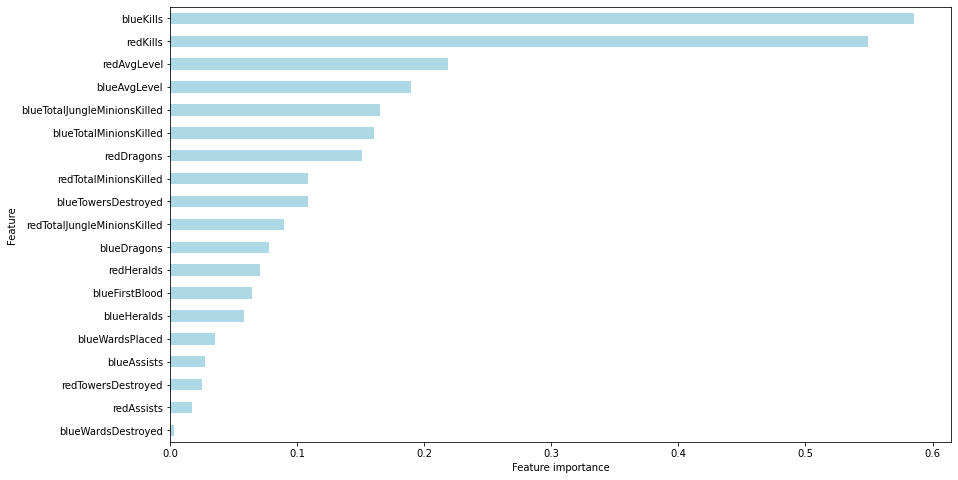

In [63]:
plot_feature_importances(logreg5)